In [105]:
import pandas as pd
import matplotlib.pyplot as plt
import importlib
import cointegration_mult as mult
import Cointegration as coint

importlib.reload(coint)
importlib.reload(mult)

<module 'cointegration_mult' from 'D:\\trades\\pairs_trading_b3\\cointegration_mult.py'>

In [106]:
def plot_pairs(pairs, data):
    for i, row in pairs.iterrows():
        y_symbol = row['Dependent']
        x_symbol = row['Independent']
        period = row['Period']
        mult.plot_residue3(data, y_symbol, x_symbol, period)

In [107]:
path_data_cart = 'datasets/data_cart.csv'
path_data_yahoo = 'datasets/data_yahoo.csv'
path_data = 'datasets/data.csv'

In [108]:
data = pd.read_csv(path_data_yahoo, index_col=0)
data = data[::-1]
pairs = pd.read_csv('datasets/cointegrated_pairs_mult.csv')

print('{} to {}'.format(data.index[-1], data.index[0]))
print('data: {}'.format(data.shape))
print('pairs: {}'.format(pairs.shape))

2019-05-02 to 2020-07-17
data: (302, 74)
pairs: (2131, 12)


In [5]:
pairs

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,100,ABEV3,AZUL4,-4.237986,99,0.135631,2,0.688692,0.371400,Long/Short,1,100
1,100,ABEV3,B3SA3,-4.839513,99,0.202259,2,0.649287,0.935228,Long/Short,1,100
2,240,ABEV3,BBAS3,-3.162940,95,0.225470,9,0.595396,0.682888,Short/Long,6,"100,140,160,180,220,240"
3,240,ABEV3,BBDC3,-2.928121,95,0.340783,10,0.603970,0.718327,Short/Long,7,"100,120,140,160,180,220,240"
4,240,ABEV3,BBDC4,-3.060968,95,0.353076,9,0.588824,0.616026,Short/Long,7,"100,120,140,160,180,220,240"
...,...,...,...,...,...,...,...,...,...,...,...,...
2126,220,VIVT4,WEGE3,-3.279092,95,0.480042,9,0.346942,0.400231,Long/Short,7,"100,120,140,160,180,200,220"
2127,250,VIVT4,YDUQ3,-4.590242,99,0.344521,4,0.332407,0.006864,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2128,250,VVAR3,WEGE3,-3.053236,95,0.573819,12,0.564577,0.635856,Short/Long,3,"220,240,250"
2129,250,VVAR3,YDUQ3,-3.070508,95,0.266457,15,0.552602,1.580891,Short/Long,9,"100,120,140,160,180,200,220,240,250"


In [6]:
pairs_signal = pairs.loc[
    (pairs['Signal'] >= 1) \
    & (pairs['Signal'] <= 1.2) \
    & (pairs['PeriodQt'] >= 9) \
    & (pairs['ADF'] >= 99) \
    & (pairs['HalfLife'] <= 6) \
].sort_values(by=['HalfLife'], ascending=True).copy()
pairs_signal.reset_index(drop=True, inplace=True)
pairs_signal

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,BRAP4,UGPA3,-5.741550,99,0.944970,4,0.609785,1.025329,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,CSAN3,IGTA3,-4.910881,99,1.264812,4,0.724110,1.086137,Short/Long,9,"100,120,140,160,180,200,220,240,250"
2,250,CSAN3,TAEE11,-4.767161,99,5.439949,4,0.604793,1.134722,Short/Long,9,"100,120,140,160,180,200,220,240,250"
3,250,TAEE11,USIM5,-4.865033,99,0.849851,4,0.475935,1.086010,Long/Short,9,"100,120,140,160,180,200,220,240,250"
4,250,BBAS3,TAEE11,-4.421017,99,3.691353,5,0.603304,1.024890,Short/Long,9,"100,120,140,160,180,200,220,240,250"
5,250,BBAS3,YDUQ3,-4.215732,99,0.655510,5,0.601349,1.051504,Short/Long,9,"100,120,140,160,180,200,220,240,250"
6,250,CSAN3,MULT3,-4.623135,99,1.980573,5,0.698889,1.115022,Short/Long,9,"100,120,140,160,180,200,220,240,250"
7,250,BRAP4,GGBR4,-4.018404,99,1.031962,6,0.732234,1.063431,Short/Long,9,"100,120,140,160,180,200,220,240,250"
8,250,CMIG4,ENGI11,-4.139123,99,0.298731,6,0.765906,1.036263,Short/Long,9,"100,120,140,160,180,200,220,240,250"
9,250,CMIG4,VVAR3,-3.963905,99,0.485915,6,0.624383,1.198031,Long/Short,9,"100,120,140,160,180,200,220,240,250"


Plot o gráficos dos resíduos de 'pairs_signal'

In [7]:
#plot_pairs(pairs_signal, data)

In [8]:
#pairs_signal.to_csv('datasets/sinais/sinais_06072020.csv', index=False)

In [9]:
#pairs_signal.iloc[[0,1,3]].to_csv('datasets/oper/13072020.csv', index=False)

# Análise das operações abertas

In [10]:
oper = pd.read_csv('datasets/oper/13072020.csv')
oper

,Period,Dependent,Independent,Dickey-Fuller,ADF,Beta,HalfLife,Corr,Signal,SignalStr,PeriodQt,PeriodStr
0,250,CMIG4,ENGI11,-4.257065,99,0.298534,5,0.768918,1.023665,Short/Long,9,"100,120,140,160,180,200,220,240,250"
1,250,BRKM5,LAME4,-4.066723,99,1.197584,6,0.554915,1.082008,Long/Short,9,"100,120,140,160,180,200,220,240,250"
2,250,ELET3,PCAR3,-4.496931,99,0.477546,6,0.314905,1.105713,Short/Long,9,"100,120,140,160,180,200,220,240,250"


C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


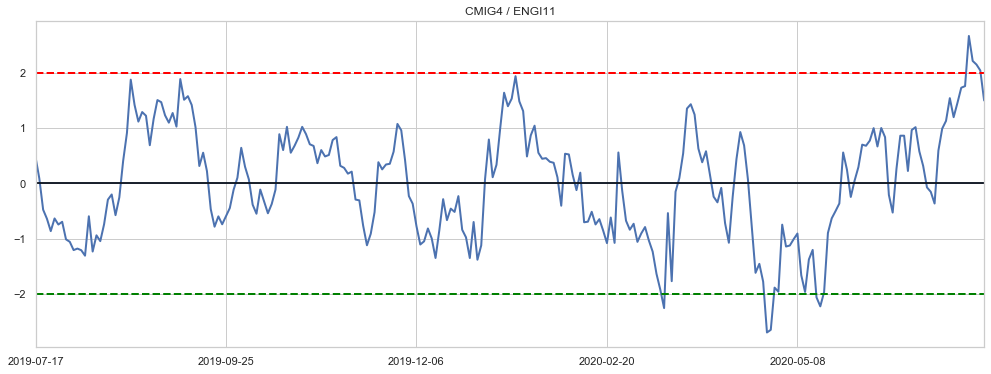

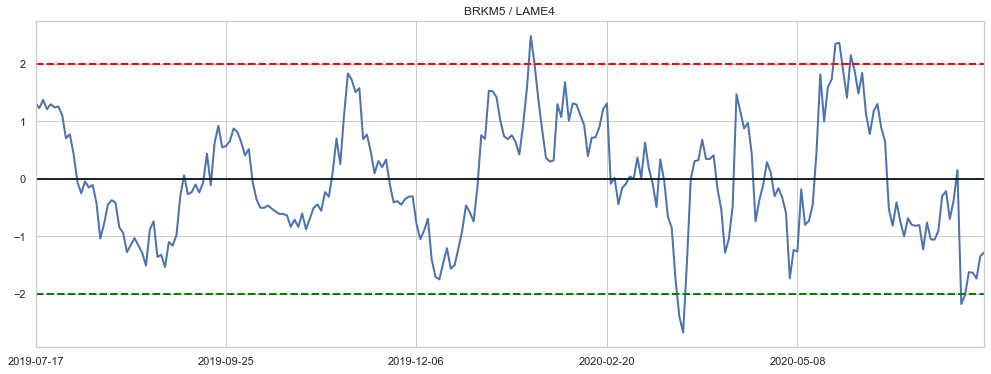

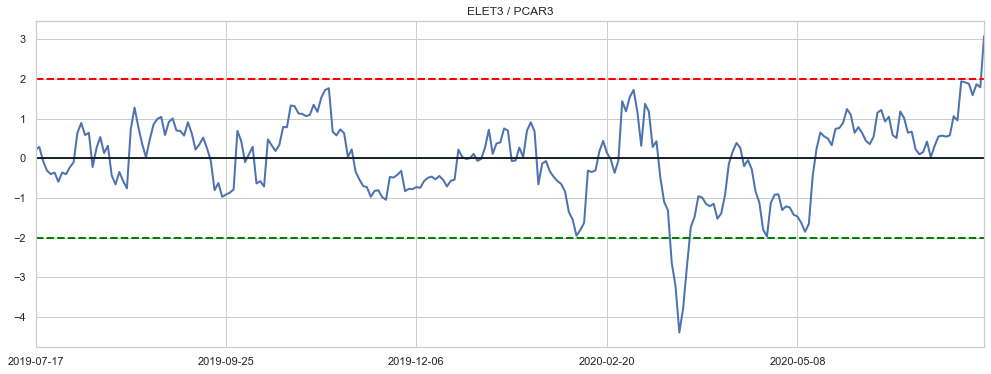

In [11]:
plot_pairs(oper, data)

In [12]:
mult.summary(data, 'CMIG4', 'ENGI11', 250)
mult.summary(data, 'BRKM5', 'LAME4', 250)
mult.summary(data, 'ELET3', 'PCAR3', 250)

Período de Análise                   250   Entrada                              Não
Independente                       CMIG4   Dependente                        ENGI11
R$                                 11.33   R$                                 47.73
Ratio                0.23737691247367654   
Somente para operação Beta Neutral:
Retorno  (%)          11.508561854677147   Gain                   97.62222008663069
Atual    (%)           8.616259553751027   Loss                 -60.859347461681985
Loss     (%)         -5.3715223187552175                                           
Dickey Fuller         -3.959976412275763   Meia Vida                              6
ADF                                   99   Correlação  (%)        76.57818207168745
p-value            0.0016352129703878515   Inverter                           False
                                           Beta                 0.29891063460524286
Ratio Entrada         4.1034406026271855   
Ratio Saída            4.57568760255

In [280]:
testdf = data[data.index < '2020-07-13'].copy()

In [281]:
y_symbol = 'ELET3'
x_symbol = 'PCAR3'
y = testdf[y_symbol]
x = testdf[x_symbol]

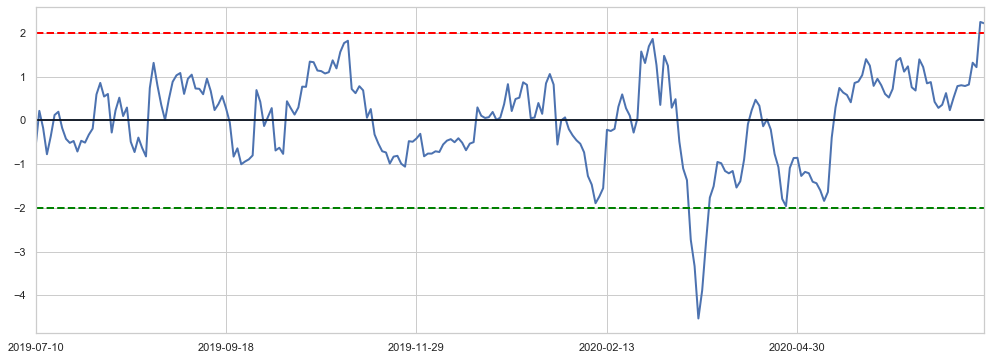

In [282]:
mult.plot_residue(mult.residue(y, x, 250))

In [283]:
def stop_loss(y, x, volume, period, price_input=0, y_short=True):
    y_test = y.copy()
    x_test = x.copy()
    
    if (price_input <= 0):
        if (y_short):
            price_input=y_test[0]
        else:
            price_input=x_test[0]
    
    penny = 0
    while (True):
        penny+=0.01
        if (y_short):
            y_test[0] = y_test[0] + penny
        else:
            x_test[0] = x_test[0] - penny

        resid = mult.zscore(mult.residue(y_test, x_test, period))
        if(abs(resid[0]) >= 3.1):
            break
    
    fin_input = (price_input*volume)
    
    if (y_short):        
        return (fin_input-(y_test[0]*volume))
    return ((x_test[0]*volume)-fin_input)

In [284]:
y_test = y.copy()
x_test = x.copy()

In [285]:
y_test[0]

36.27000045776367

In [291]:
stop_loss(y, x, volume=200,period=250)

-600.0

In [293]:
mult.loss(y, x, 200, 250)

-648.7941101165463

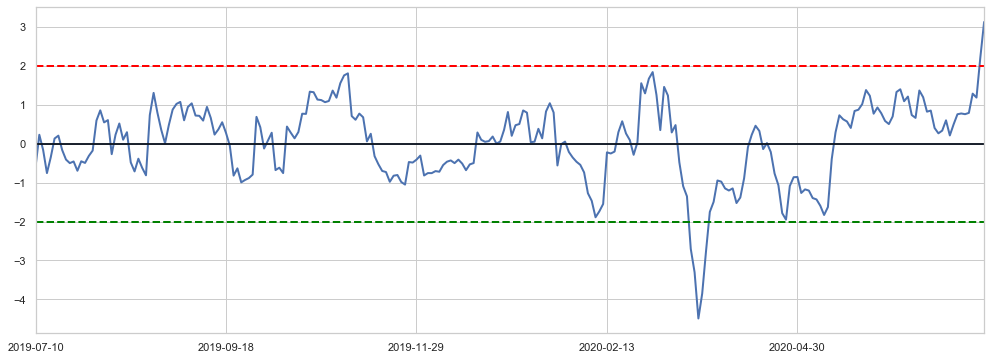

In [272]:
mult.plot_residue(mult.residue(y_test, x_test, 250))

In [50]:
type(y_test.as_matrix())

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


numpy.ndarray

In [64]:
y_test = y
x_test = x

price_start = y_test[0]
y_test[0]=40
print('start: {}, simu: {}, x_fixed: {}'.format(price_start, y_test[0], x_test[0]))

start: 26416.00000000011, simu: 40.0, x_fixed: 70.69999694824219


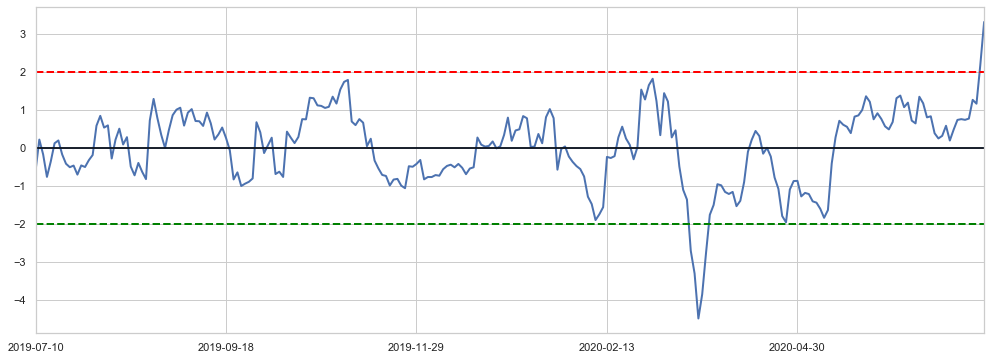

In [60]:
mult.plot_residue(mult.residue(y_test, x_test, 250))

In [197]:
mult.summary(testdf, y_symbol, x_symbol, 250, y_volume=100)

Período de Análise                   250   Entrada       Venda:ELET3 / Compra:PCAR3
Independente                       ELET3   Dependente                         PCAR3
R$                                 39.31   R$                                  70.7
Ratio                 0.5560113458921588   
→ CASH NEUTRAL ←
ELET3                          -179.8525   Financeiro R$                 -7070.0018
PCAR3                                100   Financeiro R$                     7070.0
                                                                            -0.0018
→ BETA NEUTRAL ←
PCAR3                                 47   Financeiro R$                     3322.9
ELET3                               -100   Financeiro R$                    -3931.0
                                                                             -608.1
Somente para operação Beta Neutral:
Retorno  (%)          21.917669952649167   Gain                  1342.4307115394176
Atual    (%)          34.149852350721346   Los

In [17]:
"""excel = testdf.copy()
excel.to_excel('datasets/data_cart.xlsx')"""

"excel = testdf.copy()\nexcel.to_excel('datasets/data_cart.xlsx')"

In [18]:
mrlm = mult.regression(y, x, 250)

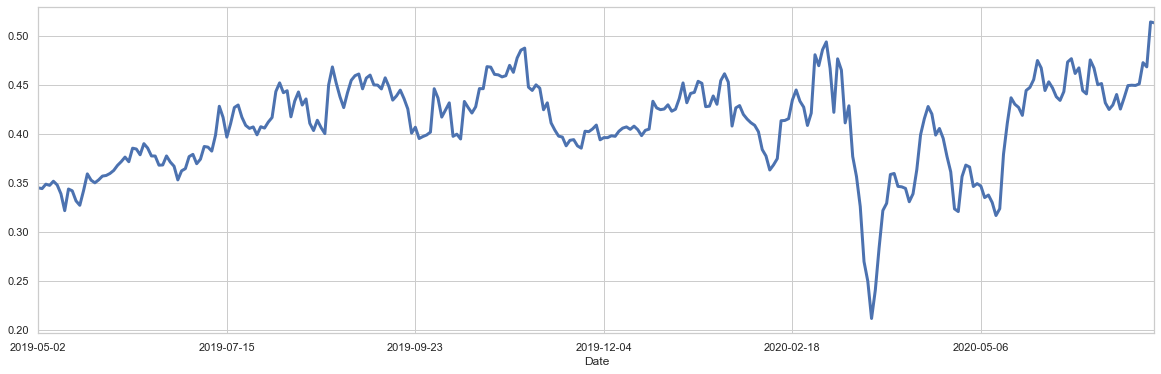

In [21]:
(y/x)[::-1].plot(figsize=(20,6), linewidth=3)